In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_iris
from knn import KNN

Load the dataset with scikit-learn.


In [2]:
iris = load_iris()

Split dataset to train and test datasets (%80 for train and %20 for test).


In [3]:
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Implement and fit your object oriented KNN algorithm on the train dataset.


In [14]:
knn = KNN(5)
knn.fit(X_train, Y_train)
print(knn.predict([[5.4, 3.7, 1.5, 0.2],
                   [5.8, 2.8, 5.1, 2.4],
                   [5.9, 3.2, 4.8, 1.8]]))

[0, 2, 2]


In [19]:
Y_pred = knn.predict(X_test)

Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ...


In [15]:
K =[3,5,7,9,11]
accuracy=[]
for k in K:
    knn = KNN(K=k)
    knn.fit(np.array(X_train), np.array(Y_train))
    accuracy.append(knn.evaluate(np.array(X_test), np.array(Y_test)))

In [16]:
print(accuracy)

[0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667]


In [17]:
K =[3,5,7,9,11]
accuracy_skl=[]
for k in K:
    knn_skl = KNeighborsClassifier(n_neighbors=k)
    knn_skl.fit(X_train, Y_train)
    accuracy_skl.append(knn_skl.score(X_test, Y_test))

In [18]:
print(accuracy_skl)

[0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667]



Calculate confusion matrix for test dataset (3x3).

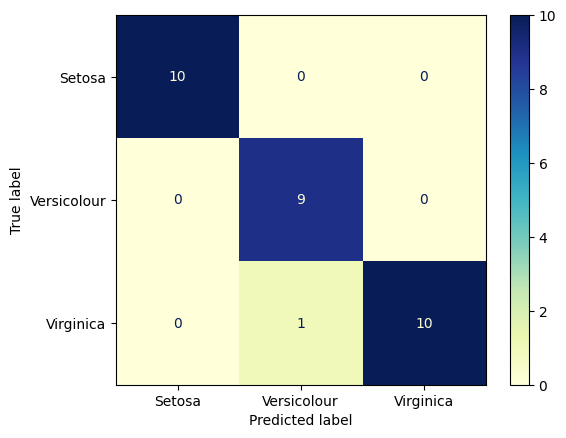

In [23]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolour', 'Virginica'])

cm_display.plot(cmap='YlGnBu')
plt.savefig('Outputs/IRIS_cm.png')
plt.show()